In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping

from lightgbm import LGBMRegressor
import random
import xgboost as xgb

import pandas as pd 
import numpy as np
import lightgbm as lgb

In [2]:
curr_dir = os.getcwd()
curr_dir

'C:\\weather\\uv_new'

In [3]:
forders_tr = os.listdir(curr_dir+"\\data\\"+"\\uv_train_val")
forders_tr

['uv_train.csv']

In [4]:
df= pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\uv_train_val\\")+forders_tr[0])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533612 entries, 0 to 1533611
Data columns (total 27 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   yyyymmdd  1533612 non-null  int64  
 1   hhnn      1533612 non-null  int64  
 2   stn       1533612 non-null  int64  
 3   lon       1533612 non-null  float64
 4   lat       1533612 non-null  float64
 5   uv        1533612 non-null  float64
 6   band1     1533612 non-null  float64
 7   band2     1533612 non-null  float64
 8   band3     1533612 non-null  float64
 9   band4     1533612 non-null  float64
 10  band5     1533612 non-null  float64
 11  band6     1533612 non-null  float64
 12  band7     1533612 non-null  float64
 13  band8     1533612 non-null  float64
 14  band9     1533612 non-null  float64
 15  band10    1533612 non-null  float64
 16  band11    1533612 non-null  float64
 17  band12    1533612 non-null  float64
 18  band13    1533612 non-null  float64
 19  band14    1533612 non

In [6]:
# landtype, yyyymmdd, hhnn, stn

In [7]:
df['landtype'] = df['landtype'].astype('object')
df['hhnn'] = df['hhnn'].astype('object')
df['stn'] = df['stn'].astype('object')


# obj_feat = list(df.loc[:, df.dtypes == 'object'].columns.values)
# obj_feat

# for feature in obj_feat:
#     df[feature] = pd.Series(df[feature], dtype="category")

In [8]:
obj_feat = list(df.loc[:, df.dtypes == 'object'].columns.values)
obj_feat

['hhnn', 'stn', 'landtype']

In [9]:
# df = pd.DataFrame()
for feature in obj_feat:
    df[feature] = pd.Series(df[feature], dtype="category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533612 entries, 0 to 1533611
Data columns (total 27 columns):
 #   Column    Non-Null Count    Dtype   
---  ------    --------------    -----   
 0   yyyymmdd  1533612 non-null  int64   
 1   hhnn      1533612 non-null  category
 2   stn       1533612 non-null  category
 3   lon       1533612 non-null  float64 
 4   lat       1533612 non-null  float64 
 5   uv        1533612 non-null  float64 
 6   band1     1533612 non-null  float64 
 7   band2     1533612 non-null  float64 
 8   band3     1533612 non-null  float64 
 9   band4     1533612 non-null  float64 
 10  band5     1533612 non-null  float64 
 11  band6     1533612 non-null  float64 
 12  band7     1533612 non-null  float64 
 13  band8     1533612 non-null  float64 
 14  band9     1533612 non-null  float64 
 15  band10    1533612 non-null  float64 
 16  band11    1533612 non-null  float64 
 17  band12    1533612 non-null  float64 
 18  band13    1533612 non-null  float64 
 19  

In [10]:
# df[df['yyyymmdd'] == 20210801].index[0]  # 1209883
# df.iloc[df[df['yyyymmdd'] == 20210801].index[0]:]
# df.iloc[:df[df['yyyymmdd'] == 20210801].index[0]]


tr1 = df.iloc[df[df['yyyymmdd'] == 20200301].index[0]:df[df['yyyymmdd'] == 20201101].index[0]]
tr2 = df.iloc[df[df['yyyymmdd'] == 20210301].index[0]:df[df['yyyymmdd'] == 20210601].index[0]]

train = pd.concat([tr1,tr2],axis=0)
train

val = df.iloc[df[df['yyyymmdd'] == 20210601].index[0]:df[df['yyyymmdd'] == 20211101].index[0]]
val

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
1081631,20210601,0,13,126.16000,33.30000,0.0,-0.00057,-0.00057,-0.00030,-0.00015,...,261.03071,288.20636,288.66218,286.97684,272.21622,123.72706,38.96359,-5.16304,71.00,0
1081632,20210601,0,105,128.89098,37.75147,0.0,-0.00057,-0.00057,0.00000,-0.00045,...,256.15457,285.14982,285.66768,284.50661,269.76639,119.74915,43.95463,-4.61100,26.04,3
1081633,20210601,0,108,126.96500,37.57100,0.0,0.00000,-0.00057,0.00060,-0.00015,...,256.41393,286.39491,285.72467,283.89278,268.45384,119.65871,43.77999,-4.60329,85.50,3
1081634,20210601,0,112,126.62490,37.47772,0.0,0.00000,0.00000,0.00119,0.00045,...,249.10733,271.33255,269.35770,266.14521,254.67280,119.71313,43.67046,-4.61180,68.99,3
1081635,20210601,0,115,130.89864,37.48129,0.0,0.00000,0.00000,-0.00030,0.00030,...,255.71332,284.26863,284.04553,281.98743,267.51267,120.21661,43.74521,-4.67107,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403209,20211031,2350,146,127.11900,35.84080,0.1,0.00000,-0.00057,0.00030,-0.00015,...,243.98668,261.95199,261.21896,259.29863,250.50021,157.14313,41.81018,-8.56636,62.90,3
1403210,20211031,2350,152,129.33472,35.58250,0.0,0.00000,0.00000,-0.00089,0.00120,...,255.89419,281.48837,281.57322,280.00595,265.73255,157.99342,41.52495,-8.67521,82.00,2
1403211,20211031,2350,156,126.89158,35.17294,0.0,0.00057,0.00000,0.00000,0.00015,...,246.57815,265.43902,264.76641,262.60697,252.65714,157.69250,41.04849,-8.59148,72.38,3
1403212,20211031,2350,159,129.03203,35.10468,0.0,0.00057,0.00000,-0.00179,-0.00060,...,257.75436,284.11394,283.85736,280.96228,265.34129,158.37811,40.96396,-8.68840,69.56,3


In [11]:
val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321583 entries, 1081631 to 1403213
Data columns (total 27 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   yyyymmdd  321583 non-null  int64   
 1   hhnn      321583 non-null  category
 2   stn       321583 non-null  category
 3   lon       321583 non-null  float64 
 4   lat       321583 non-null  float64 
 5   uv        321583 non-null  float64 
 6   band1     321583 non-null  float64 
 7   band2     321583 non-null  float64 
 8   band3     321583 non-null  float64 
 9   band4     321583 non-null  float64 
 10  band5     321583 non-null  float64 
 11  band6     321583 non-null  float64 
 12  band7     321583 non-null  float64 
 13  band8     321583 non-null  float64 
 14  band9     321583 non-null  float64 
 15  band10    321583 non-null  float64 
 16  band11    321583 non-null  float64 
 17  band12    321583 non-null  float64 
 18  band13    321583 non-null  float64 
 19  band14    321583

In [12]:
ratio=[]
num = []
for i in range(len(train.columns)):
    ratio.append(len(train[train[train.columns[i]] == -999.0])/len(train))
    num.append(len(train[train[train.columns[i]] == -999.0]))
ratio

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [13]:
# val = pd.DataFrame()

# for files in summer_val:
#     df= pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\outlier_train_val\\")+files)
#     val = pd.concat([val, df])
    
# val.drop('idx', axis=1, inplace=True)
# val

In [14]:
ratio=[]
num = []
for i in range(len(val.columns)):
    ratio.append(len(val[val[val.columns[i]] == -999.0])/len(val))
    num.append(len(val[val[val.columns[i]] == -999.0]))
ratio

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [15]:
forders_te = os.listdir(curr_dir+"\\data\\"+"\\uv_test")
forders_te

['uv_test.csv']

In [16]:
# forders_te = os.listdir(curr_dir+"\\data\\"+"\\test")
# forders_te

df = pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\uv_test\\")+forders_te[0])
# d = list(df.columns)
# for j in range(1,len(d)):
#     d[j] = d[j].replace("202206_uv.", "")
# df.columns = d
# df.drop('Unnamed: 0', axis=1, inplace=True)
low = df.columns.str.lower() 
low
df.columns = low
df
    
df['landtype'] = df['landtype'].astype('object')
df['hhnn'] = df['hhnn'].astype('object')
df['stn'] = df['stn'].astype('object')


obj_feat = list(df.loc[:, df.dtypes == 'object'].columns.values)
obj_feat

for feature in obj_feat:
    df[feature] = pd.Series(df[feature], dtype="category")
    
    
test = df
test.describe()
test

,yyyymmdd,hhnn,stn,lon,lat,uv,band1,band2,band3,band4,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,20220601,0,13,126.16000,33.30000,NaN,0.00000,0.00000,-0.00060,0.00060,...,241.07130,251.49092,250.11913,248.78686,243.12601,123.72706,38.96359,-5.16304,71.00,0
1,20220601,0,105,128.89098,37.75147,NaN,-0.00057,-0.00057,0.00000,-0.00030,...,244.35010,262.71227,261.14580,257.52658,246.95577,119.74915,43.95463,-4.61100,26.04,3
2,20220601,0,108,126.96500,37.57100,NaN,0.00000,-0.00057,-0.00030,0.00045,...,249.24111,271.81756,270.25616,266.99858,254.94651,119.65871,43.77999,-4.60329,85.50,3
3,20220601,0,112,126.62490,37.47772,NaN,0.00000,0.00000,0.00060,0.00045,...,249.94977,273.52547,272.33661,269.12853,256.15036,119.71313,43.67046,-4.61180,68.99,3
4,20220601,0,115,130.89864,37.48129,NaN,0.00000,0.00000,0.00089,-0.00030,...,239.88321,253.29031,251.46606,249.01625,240.92761,120.21661,43.74521,-4.67107,222.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51850,20220625,0,146,127.11900,35.84080,NaN,0.00000,-0.00057,-0.00089,0.00015,...,258.49191,286.87485,287.19605,285.48855,271.35400,119.84431,41.81018,-4.59718,62.90,3
51851,20220625,0,152,129.33472,35.58250,NaN,-0.00057,0.00000,-0.00030,-0.00030,...,263.99872,293.32422,293.51096,291.15861,274.60342,120.42121,41.52495,-4.67124,82.00,2
51852,20220625,0,156,126.89158,35.17294,NaN,0.00000,0.00000,0.00089,-0.00030,...,261.53112,290.14436,290.23278,288.05655,273.15633,120.46896,41.04849,-4.68457,72.38,3
51853,20220625,0,159,129.03203,35.10468,NaN,0.00000,0.00057,0.00030,-0.00075,...,260.95627,287.80066,287.63090,285.01340,270.36623,120.85844,40.96396,-4.73249,69.56,3


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51855 entries, 0 to 51854
Data columns (total 27 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   yyyymmdd  51855 non-null  int64   
 1   hhnn      51855 non-null  category
 2   stn       51855 non-null  category
 3   lon       51855 non-null  float64 
 4   lat       51855 non-null  float64 
 5   uv        0 non-null      float64 
 6   band1     51855 non-null  float64 
 7   band2     51855 non-null  float64 
 8   band3     51855 non-null  float64 
 9   band4     51855 non-null  float64 
 10  band5     51855 non-null  float64 
 11  band6     51855 non-null  float64 
 12  band7     51855 non-null  float64 
 13  band8     51855 non-null  float64 
 14  band9     51855 non-null  float64 
 15  band10    51855 non-null  float64 
 16  band11    51855 non-null  float64 
 17  band12    51855 non-null  float64 
 18  band13    51855 non-null  float64 
 19  band14    51855 non-null  float64 
 20  band15

In [18]:
ratio=[]
num = []
for i in range(len(test.columns)):
    ratio.append(len(test[test[test.columns[i]] == -999.0])/len(test))
    num.append(len(test[test[test.columns[i]] == -999.0]))
ratio

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

# Model

In [30]:
# X_test = test.drop(['yyyymmdd', 'hhnn', 'stn', 'lon', 'lat', 'uv', 'landtype'],axis=1)

In [24]:
X_train = train.drop(['lon', 'lat', 'uv'], axis=1)
X_val = val.drop(['lon', 'lat', 'uv'],axis=1)
X_test = test.drop(['lon', 'lat', 'uv'],axis=1)

y_train = train[['uv']].values
y_val = val[['uv']].values


# params = {
#     'n_estimators': [500, 1000, 3000], 
#     'learning_rate': [0.1, 0.05, 0.01], 
#     'max_depth': [5, 7, 9, 11], 
# #     'colsample_bytree': [0.8, 0.9], 
# #     'subsample': [0.8, 0.9],
#     'num_leaves':[31]
# }

# from sklearn.model_selection import GridSearchCV

# grid_search = GridSearchCV(LGBMRegressor(), params, cv=3, n_jobs=-1)
# grid_search.fit(X_train, y_train, 
#           eval_set=[(X_val, y_val)],
#           eval_metric=["mse"],
#           early_stopping_rounds=200,
#           verbose=True)                    


In [29]:
max_depth = 9
lr = 0.05
num_leaves = 31
colsample_bytree = 0.8
categorical_features = obj_feat
n_estimators = 3000
early_stopping_rounds = 200
verbose = True

In [30]:
# categorical_features = ['LandType','Height']
# for c in categorical_features:
#     X_train_ta[c] = X_train_ta[c].astype('category')
# for c in categorical_features:
#     X_val_ta[c] = X_val_ta[c].astype('category')    
# X_val_ta.info()
lgbm_reg = LGBMRegressor(objective= "regression",
                 max_depth= max_depth,
                 n_estimators= n_estimators,
                 learning_rate= lr,
                 colsample_bytree= colsample_bytree,
                 categorical_feature =categorical_features,
                 num_leaves = num_leaves)

lgbm_reg.fit(X_train, y_train,
          eval_set=[(X_val, y_val)],
          eval_metric=["rmse"],
          early_stopping_rounds=early_stopping_rounds,
          verbose=verbose) 

C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\lightgbm\basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this 

[1]	valid_0's rmse: 2.26035	valid_0's l2: 5.1092
[2]	valid_0's rmse: 2.16176	valid_0's l2: 4.67321
[3]	valid_0's rmse: 2.06891	valid_0's l2: 4.28037
[4]	valid_0's rmse: 1.98491	valid_0's l2: 3.93986
[5]	valid_0's rmse: 1.90391	valid_0's l2: 3.62488
[6]	valid_0's rmse: 1.8272	valid_0's l2: 3.33867
[7]	valid_0's rmse: 1.75258	valid_0's l2: 3.07153
[8]	valid_0's rmse: 1.68151	valid_0's l2: 2.82747
[9]	valid_0's rmse: 1.61819	valid_0's l2: 2.61855
[10]	valid_0's rmse: 1.55409	valid_0's l2: 2.41518
[11]	valid_0's rmse: 1.49643	valid_0's l2: 2.23929
[12]	valid_0's rmse: 1.44164	valid_0's l2: 2.07833
[13]	valid_0's rmse: 1.38986	valid_0's l2: 1.9317
[14]	valid_0's rmse: 1.34169	valid_0's l2: 1.80014
[15]	valid_0's rmse: 1.29516	valid_0's l2: 1.67745
[16]	valid_0's rmse: 1.24967	valid_0's l2: 1.56167
[17]	valid_0's rmse: 1.2066	valid_0's l2: 1.45589
[18]	valid_0's rmse: 1.16975	valid_0's l2: 1.36831
[19]	valid_0's rmse: 1.13311	valid_0's l2: 1.28393
[20]	valid_0's rmse: 1.09736	valid_0's l2: 1

[163]	valid_0's rmse: 0.596918	valid_0's l2: 0.356312
[164]	valid_0's rmse: 0.59729	valid_0's l2: 0.356755
[165]	valid_0's rmse: 0.597163	valid_0's l2: 0.356603
[166]	valid_0's rmse: 0.597149	valid_0's l2: 0.356587
[167]	valid_0's rmse: 0.596878	valid_0's l2: 0.356263
[168]	valid_0's rmse: 0.596739	valid_0's l2: 0.356098
[169]	valid_0's rmse: 0.596792	valid_0's l2: 0.356161
[170]	valid_0's rmse: 0.59693	valid_0's l2: 0.356325
[171]	valid_0's rmse: 0.596881	valid_0's l2: 0.356266
[172]	valid_0's rmse: 0.596761	valid_0's l2: 0.356123
[173]	valid_0's rmse: 0.596564	valid_0's l2: 0.355889
[174]	valid_0's rmse: 0.596526	valid_0's l2: 0.355844
[175]	valid_0's rmse: 0.596317	valid_0's l2: 0.355595
[176]	valid_0's rmse: 0.596168	valid_0's l2: 0.355417
[177]	valid_0's rmse: 0.596041	valid_0's l2: 0.355264
[178]	valid_0's rmse: 0.596043	valid_0's l2: 0.355267
[179]	valid_0's rmse: 0.59708	valid_0's l2: 0.356505
[180]	valid_0's rmse: 0.597334	valid_0's l2: 0.356808
[181]	valid_0's rmse: 0.597308	

[320]	valid_0's rmse: 0.597489	valid_0's l2: 0.356993
[321]	valid_0's rmse: 0.597477	valid_0's l2: 0.356979
[322]	valid_0's rmse: 0.598021	valid_0's l2: 0.357629
[323]	valid_0's rmse: 0.598005	valid_0's l2: 0.35761
[324]	valid_0's rmse: 0.597951	valid_0's l2: 0.357546
[325]	valid_0's rmse: 0.597937	valid_0's l2: 0.357529


LGBMRegressor(categorical_feature=['hhnn', 'stn', 'landtype'],
              colsample_bytree=0.8, learning_rate=0.05, max_depth=9,
              n_estimators=3000, objective='regression')

In [35]:
pred = lgbm_reg.predict(X_test)
submission=pd.read_csv('1-1_검증데이터셋.csv', encoding='utf-8')
submission1=submission.copy()
submission1['UV'] = pred
submission1
# submission1.to_csv("220224_lgbm_uv_nooutlier_summer1_gs1.csv", index = False)

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,0.004036
1,202206010000,105,0.004597
2,202206010000,108,0.004976
3,202206010000,112,0.005324
4,202206010000,115,0.004455
...,...,...,...
51850,202206250000,146,0.006860
51851,202206250000,152,0.010747
51852,202206250000,156,0.007716
51853,202206250000,159,0.007677


<AxesSubplot:>

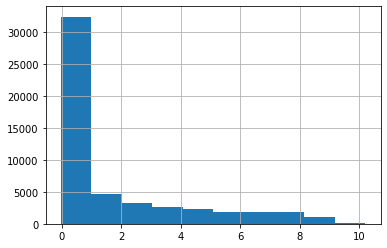

In [37]:
submission1['UV'].hist()

In [ ]:
# -------------------------------------

# 아래는 비율 확인한 것

In [53]:
ddd

,YearMonthDayHourMinute,STN,UV
0,202206010000,13,-0.003720
1,202206010000,105,-0.005291
2,202206010000,108,-0.002185
3,202206010000,112,0.001383
4,202206010000,115,0.000958
...,...,...,...
51850,202206250000,146,0.005621
51851,202206250000,152,-0.002203
51852,202206250000,156,0.006888
51853,202206250000,159,0.005210


In [38]:
li = list(submission1['UV'].values)
li
li_neg = []
li_0_1=[]
li_1_2=[]
li_2_3=[]
li_3_4=[]
li_4_5=[]
li_5_6=[]
li_6_7=[]
li_7_8=[]
li_8_9=[]
li_9_10=[]
li_10_11=[]
li_11_12=[]
li_12_13=[]
li_13_=[]
for i in range(len(li)):
    if li[i]<0:
        li_neg.append(li[i])
    elif (li[i]>=0 and li[i]<1):
        li_0_1.append(li[i])
    elif (li[i]>=1 and li[i]<2):
        li_1_2.append(li[i])
    elif (li[i]>=2 and li[i]<3):
        li_2_3.append(li[i])
    elif (li[i]>=3 and li[i]<4):
        li_3_4.append(li[i])
    elif (li[i]>=4 and li[i]<5):
        li_4_5.append(li[i])
    elif (li[i]>=5 and li[i]<6):
        li_5_6.append(li[i])
    elif (li[i]>=6 and li[i]<7):
        li_6_7.append(li[i])
    elif (li[i]>=7 and li[i]<8):
        li_7_8.append(li[i])
    elif (li[i]>=8 and li[i]<9):
        li_8_9.append(li[i])
    elif (li[i]>=9 and li[i]<10):
        li_9_10.append(li[i])
    elif (li[i]>=10 and li[i]<11):
        li_10_11.append(li[i])
    elif (li[i]>=11 and li[i]<12):
        li_11_12.append(li[i])
    elif (li[i]>=12 and li[i]<13):
        li_12_13.append(li[i])
    elif li[i]>=13:
        li_13_.append(li[i])
        
# df11_num = pd.DataFrame([len(li_0_1),len(li_1_2),len(li_2_3),len(li_3_4),len(li_4_5),len(li_5_6),\
#                         len(li_6_7),len(li_7_8),len(li_8_9),len(li_9_10),len(li_10_11),len(li_11_12),len(li_12_13),\
#                         len(li_13_)])
# df11_num

df11_ratio = pd.DataFrame([100*len(li_neg)/len(li), 100*len(li_0_1)/len(li), 100*len(li_1_2)/len(li), 100*len(li_2_3)/len(li),\
                         100*len(li_3_4)/len(li), 100*len(li_4_5)/len(li), 100*len(li_5_6)/len(li), \
                          100*len(li_6_7)/len(li),100*len(li_7_8)/len(li),100*len(li_8_9)/len(li),100*len(li_9_10)/len(li),\
                          100*len(li_10_11)/len(li),100*len(li_11_12)/len(li),100*len(li_12_13)/len(li),\
                          100*len(li_13_)/len(li)])
df11_ratio

# df11_1 = pd.concat([df11_num,df11_ratio],axis=1)
df11_ratio.columns = ['_ratio']
df11_ratio.index = ['neg','0_1','1_2','2_3','3_4','4_5','5_6','6_7','7_8','8_9','9_10','10_11','11_12','12_13','13_']
df11_ratio

,_ratio
neg,0.844663
0_1,61.608331
1_2,8.909459
2_3,6.086202
3_4,4.840420
4_5,4.346736
5_6,3.594639
6_7,3.521358
7_8,3.536785
8_9,2.348857


In [39]:
li = list(ddd['UV'].values)
li
li_neg = []
li_0_1=[]
li_1_2=[]
li_2_3=[]
li_3_4=[]
li_4_5=[]
li_5_6=[]
li_6_7=[]
li_7_8=[]
li_8_9=[]
li_9_10=[]
li_10_11=[]
li_11_12=[]
li_12_13=[]
li_13_=[]
for i in range(len(li)):
    if li[i]<0:
        li_neg.append(li[i])
    elif (li[i]>=0 and li[i]<1):
        li_0_1.append(li[i])
    elif (li[i]>=1 and li[i]<2):
        li_1_2.append(li[i])
    elif (li[i]>=2 and li[i]<3):
        li_2_3.append(li[i])
    elif (li[i]>=3 and li[i]<4):
        li_3_4.append(li[i])
    elif (li[i]>=4 and li[i]<5):
        li_4_5.append(li[i])
    elif (li[i]>=5 and li[i]<6):
        li_5_6.append(li[i])
    elif (li[i]>=6 and li[i]<7):
        li_6_7.append(li[i])
    elif (li[i]>=7 and li[i]<8):
        li_7_8.append(li[i])
    elif (li[i]>=8 and li[i]<9):
        li_8_9.append(li[i])
    elif (li[i]>=9 and li[i]<10):
        li_9_10.append(li[i])
    elif (li[i]>=10 and li[i]<11):
        li_10_11.append(li[i])
    elif (li[i]>=11 and li[i]<12):
        li_11_12.append(li[i])
    elif (li[i]>=12 and li[i]<13):
        li_12_13.append(li[i])
    elif li[i]>=13:
        li_13_.append(li[i])
        
# df11_num = pd.DataFrame([len(li_0_1),len(li_1_2),len(li_2_3),len(li_3_4),len(li_4_5),len(li_5_6),\
#                         len(li_6_7),len(li_7_8),len(li_8_9),len(li_9_10),len(li_10_11),len(li_11_12),len(li_12_13),\
#                         len(li_13_)])
# df11_num

df11_ratio = pd.DataFrame([100*len(li_neg)/len(li), 100*len(li_0_1)/len(li), 100*len(li_1_2)/len(li), 100*len(li_2_3)/len(li),\
                         100*len(li_3_4)/len(li), 100*len(li_4_5)/len(li), 100*len(li_5_6)/len(li), \
                          100*len(li_6_7)/len(li),100*len(li_7_8)/len(li),100*len(li_8_9)/len(li),100*len(li_9_10)/len(li),\
                          100*len(li_10_11)/len(li),100*len(li_11_12)/len(li),100*len(li_12_13)/len(li),\
                          100*len(li_13_)/len(li)])
df11_ratio

# df11_1 = pd.concat([df11_num,df11_ratio],axis=1)
df11_ratio.columns = ['_ratio']
df11_ratio.index = ['neg','0_1','1_2','2_3','3_4','4_5','5_6','6_7','7_8','8_9','9_10','10_11','11_12','12_13','13_']
df11_ratio

NameError: name 'ddd' is not defined

In [65]:
li = list(ddd1['UV'].values)
li
li_neg = []
li_0_1=[]
li_1_2=[]
li_2_3=[]
li_3_4=[]
li_4_5=[]
li_5_6=[]
li_6_7=[]
li_7_8=[]
li_8_9=[]
li_9_10=[]
li_10_11=[]
li_11_12=[]
li_12_13=[]
li_13_=[]
for i in range(len(li)):
    if li[i]<0:
        li_neg.append(li[i])
    elif (li[i]>=0 and li[i]<1):
        li_0_1.append(li[i])
    elif (li[i]>=1 and li[i]<2):
        li_1_2.append(li[i])
    elif (li[i]>=2 and li[i]<3):
        li_2_3.append(li[i])
    elif (li[i]>=3 and li[i]<4):
        li_3_4.append(li[i])
    elif (li[i]>=4 and li[i]<5):
        li_4_5.append(li[i])
    elif (li[i]>=5 and li[i]<6):
        li_5_6.append(li[i])
    elif (li[i]>=6 and li[i]<7):
        li_6_7.append(li[i])
    elif (li[i]>=7 and li[i]<8):
        li_7_8.append(li[i])
    elif (li[i]>=8 and li[i]<9):
        li_8_9.append(li[i])
    elif (li[i]>=9 and li[i]<10):
        li_9_10.append(li[i])
    elif (li[i]>=10 and li[i]<11):
        li_10_11.append(li[i])
    elif (li[i]>=11 and li[i]<12):
        li_11_12.append(li[i])
    elif (li[i]>=12 and li[i]<13):
        li_12_13.append(li[i])
    elif li[i]>=13:
        li_13_.append(li[i])
        
# df11_num = pd.DataFrame([len(li_0_1),len(li_1_2),len(li_2_3),len(li_3_4),len(li_4_5),len(li_5_6),\
#                         len(li_6_7),len(li_7_8),len(li_8_9),len(li_9_10),len(li_10_11),len(li_11_12),len(li_12_13),\
#                         len(li_13_)])
# df11_num

df11_ratio = pd.DataFrame([100*len(li_neg)/len(li), 100*len(li_0_1)/len(li), 100*len(li_1_2)/len(li), 100*len(li_2_3)/len(li),\
                         100*len(li_3_4)/len(li), 100*len(li_4_5)/len(li), 100*len(li_5_6)/len(li), \
                          100*len(li_6_7)/len(li),100*len(li_7_8)/len(li),100*len(li_8_9)/len(li),100*len(li_9_10)/len(li),\
                          100*len(li_10_11)/len(li),100*len(li_11_12)/len(li),100*len(li_12_13)/len(li),\
                          100*len(li_13_)/len(li)])
df11_ratio

# df11_1 = pd.concat([df11_num,df11_ratio],axis=1)
df11_ratio.columns = ['_ratio']
df11_ratio.index = ['neg','0_1','1_2','2_3','3_4','4_5','5_6','6_7','7_8','8_9','9_10','10_11','11_12','12_13','13_']
df11_ratio

,_ratio
neg,23.984187
0_1,37.305949
1_2,8.953814
2_3,6.055347
3_4,5.191399
4_5,4.279240
5_6,4.049754
6_7,3.662135
7_8,3.386366
8_9,2.304503
